In [1]:
import pandas as pd
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
PATH = "C:/Medicat Dataset/release/figures/" # change this to the path to your medicat images

In [3]:
files = os.listdir(PATH)

In [4]:
files[:5]

['0001a0861408d93e3060af77404e5a23a6e66bb4_4-Figure2-1.png',
 '0001fa053dd15c74727a15ef55cfca51ea656f13_4-Figure3-1.png',
 '000257db192b5fa98f9689f1f42746e6564ced89_3-Figure4-1.png',
 '000280bcd5a0c2ff0680d29c491727f892ed4f5d_2-Figure1-1.png',
 '0004114d2a3bfbb83b9a9307b37e9979295a331a_2-Figure1-1.png']

In [5]:
img = Image.open(PATH + files[0])
img.size

(650, 546)

In [6]:
df = pd.read_csv("MRI_cluster_data.csv")

In [7]:
df.head()

,Unnamed: 0,pdf_hash,fig_key,fig_uri,s2_caption,s2orc_caption,s2orc_references,radiology,scope,predicted_type,oa_info,num_words,num_words_orc,references_len,cleaned_text
0,0,26491ab76c6e8d6acc582e71bb6b3b5f5601ccc2,Figure4,3-Figure4-1.png,Figure 4. Nuclear magnetic resonance scan demo...,Figure 4. Nuclear magnetic resonance scan demo...,['Findings from nuclear magnetic resonance ima...,True,False,Medical images,"{'doi': '10.1001/archopht.117.11.1553', 'doi_u...",17,17,1,figure 4 nuclear magnetic resonance scan demon...
1,8,5f2d2f2ffbd20c7ff3ac30d514da54ee5bd825b4,Figure1,1-Figure1-1.png,Fig. 1. Brain CT (A) and MR diffusion images (...,NaN,"['However, brain CT did not show any positive ...",True,False,Medical images,"{'doi': '10.14245/kjs.2013.10.3.170', 'doi_url...",15,0,2,fig 1 brain ct mr diffusion image b c sh...
2,9,5f2d2f2ffbd20c7ff3ac30d514da54ee5bd825b4,Figure2,2-Figure2-1.png,"Fig. 2. Mid sagittal (A, C) and axial MRI (B, ...","Fig. 2. Mid sagittal (A, C) and axial MRI (B, ...",NaN,True,False,Medical images,"{'doi': '10.14245/kjs.2013.10.3.170', 'doi_url...",22,22,0,fig 2 mid sagittal c axial mri b cervic...
3,11,c857a26a72635ad947f78e7b1e627e0e1997527f,Figure1,4-Figure1-1.png,Fig. 1 Images of 64-year-old man with diagnose...,NaN,NaN,True,False,Medical images,"{'doi': '10.1186/s40644-015-0050-4', 'doi_url'...",93,0,0,fig 1 image 64yearold man diagnosed squamous ...
4,12,c857a26a72635ad947f78e7b1e627e0e1997527f,Figure3,5-Figure3-1.png,Fig. 3 Images of 60-year-old man with adenocar...,NaN,NaN,True,False,Medical images,"{'doi': '10.1186/s40644-015-0050-4', 'doi_url'...",45,0,0,fig 3 image 60yearold man adenocarcinoma left...


In [8]:
# files

In [9]:
df.shape

(32863, 15)

In [10]:
final_imgs = []

for i in range(df.shape[0]):
    
    img_name = "_".join([df["pdf_hash"][i], df["fig_uri"][i]])
    img_path = PATH + img_name
#     print(img_path) # sanity check

    try:
        img = Image.open(img_path)
        
        if img.size[0] > 64 and img.size[1] > 64 and img.size[0] < 1024 and img.size[1] < 1024: # first checking for exceptions, not dropping data yet
            final_imgs.append(img_name)
            
        
    except:
        print("Exception: ", img_path) # printing the names of any corrupted images in the dataset
        continue

    if img is None:
        print("NoneType: ", img_path)
        continue

Exception:  C:/Medicat Dataset/release/figures/55edc58da9327d3276ed341d1aaf0531614bd60e_9-Figure30–9-1.png
Exception:  C:/Medicat Dataset/release/figures/476f562b04495c6906361e128d21e1f8a9882770_13-Figure21–5-1.png
Exception:  C:/Medicat Dataset/release/figures/cff46f9cacfd77311fbd563c3f3f2eb7c5743467_6-Figure3–5-1.png
Exception:  C:/Medicat Dataset/release/figures/612ef2d693377d71dac627a3d10fd66c27ae7ac1_9-Figure13–16-1.png
Exception:  C:/Medicat Dataset/release/figures/9895f3b031c01e3ead4ac38bedf71573f61f2b6b_17-Figure27–29-1.png


In [11]:
np.array(final_imgs).shape # this number is still way above the 7k threshold. Moving on?

(17698,)

In [12]:
p = "C:/Medicat Dataset/release/figures/55edc58da9327d3276ed341d1aaf0531614bd60e_9-Figure30–9-1.png"

In [13]:
# Image.open(p) # --> ERROR file not found

In [14]:
# random img
import random

rand_int = random.randrange(0, np.array(final_imgs).shape[0],1)
rand_int

1664

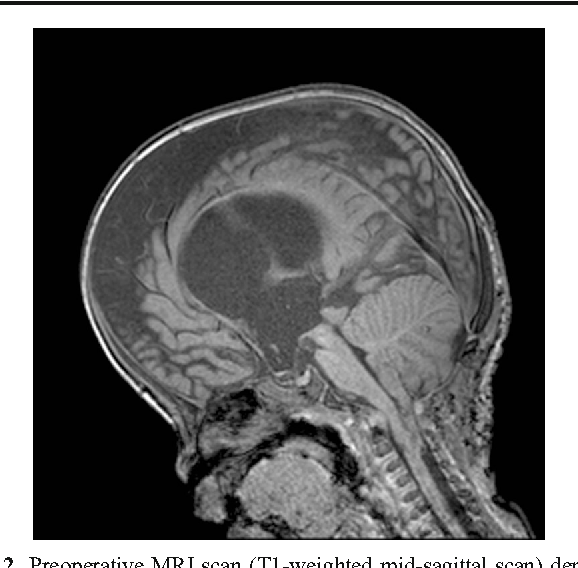

In [15]:
rand_img = Image.open(PATH + final_imgs[rand_int])
display(rand_img)

In [16]:
rand_img.size

(578, 568)

In [17]:
# dropping rows

drop_list = []

for i in range(df.shape[0]):
    
    img_name = "_".join([df["pdf_hash"][i], df["fig_uri"][i]])
    img_path = PATH + img_name
#     print(img_path) # sanity check

    try:
        img = Image.open(img_path)
        
        if img.size[0] > 64 and img.size[1] > 64 and img.size[0] < 1024 and img.size[1] < 1024: 
            continue
        else:
            drop_list.append(i)
            
        
    except:
        print("Exception: ", img_path) # printing the names of any corrupted images in the dataset
        continue

    if img is None:
        print("NoneType: ", img_path)
        continue

Exception:  C:/Medicat Dataset/release/figures/55edc58da9327d3276ed341d1aaf0531614bd60e_9-Figure30–9-1.png
Exception:  C:/Medicat Dataset/release/figures/476f562b04495c6906361e128d21e1f8a9882770_13-Figure21–5-1.png
Exception:  C:/Medicat Dataset/release/figures/cff46f9cacfd77311fbd563c3f3f2eb7c5743467_6-Figure3–5-1.png
Exception:  C:/Medicat Dataset/release/figures/612ef2d693377d71dac627a3d10fd66c27ae7ac1_9-Figure13–16-1.png
Exception:  C:/Medicat Dataset/release/figures/9895f3b031c01e3ead4ac38bedf71573f61f2b6b_17-Figure27–29-1.png


In [18]:
np.array(drop_list).shape

(15160,)

In [19]:
# drop_list # We only have to drop one image according to this. Verify? (others are exceptions-> Img not found)

In [20]:
new_df = df.copy()

new_df = new_df.drop(drop_list)

In [21]:
new_df.head()

,Unnamed: 0,pdf_hash,fig_key,fig_uri,s2_caption,s2orc_caption,s2orc_references,radiology,scope,predicted_type,oa_info,num_words,num_words_orc,references_len,cleaned_text
0,0,26491ab76c6e8d6acc582e71bb6b3b5f5601ccc2,Figure4,3-Figure4-1.png,Figure 4. Nuclear magnetic resonance scan demo...,Figure 4. Nuclear magnetic resonance scan demo...,['Findings from nuclear magnetic resonance ima...,True,False,Medical images,"{'doi': '10.1001/archopht.117.11.1553', 'doi_u...",17,17,1,figure 4 nuclear magnetic resonance scan demon...
1,8,5f2d2f2ffbd20c7ff3ac30d514da54ee5bd825b4,Figure1,1-Figure1-1.png,Fig. 1. Brain CT (A) and MR diffusion images (...,NaN,"['However, brain CT did not show any positive ...",True,False,Medical images,"{'doi': '10.14245/kjs.2013.10.3.170', 'doi_url...",15,0,2,fig 1 brain ct mr diffusion image b c sh...
2,9,5f2d2f2ffbd20c7ff3ac30d514da54ee5bd825b4,Figure2,2-Figure2-1.png,"Fig. 2. Mid sagittal (A, C) and axial MRI (B, ...","Fig. 2. Mid sagittal (A, C) and axial MRI (B, ...",NaN,True,False,Medical images,"{'doi': '10.14245/kjs.2013.10.3.170', 'doi_url...",22,22,0,fig 2 mid sagittal c axial mri b cervic...
3,11,c857a26a72635ad947f78e7b1e627e0e1997527f,Figure1,4-Figure1-1.png,Fig. 1 Images of 64-year-old man with diagnose...,NaN,NaN,True,False,Medical images,"{'doi': '10.1186/s40644-015-0050-4', 'doi_url'...",93,0,0,fig 1 image 64yearold man diagnosed squamous ...
4,12,c857a26a72635ad947f78e7b1e627e0e1997527f,Figure3,5-Figure3-1.png,Fig. 3 Images of 60-year-old man with adenocar...,NaN,NaN,True,False,Medical images,"{'doi': '10.1186/s40644-015-0050-4', 'doi_url'...",45,0,0,fig 3 image 60yearold man adenocarcinoma left...


In [22]:
new_df = new_df[new_df["num_words"]>25]

In [23]:
new_df.shape

(12154, 15)

<AxesSubplot:>

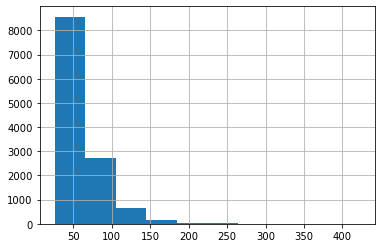

In [24]:
new_df["num_words"].hist()

In [25]:
# dropping >100 words

new_df = new_df[new_df["num_words"]<100]

<AxesSubplot:>

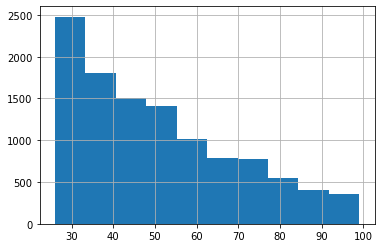

In [26]:
new_df["num_words"].hist()

In [27]:
new_df.to_csv("MRI_cluster_data_no_outliers.csv", index=False)

In [44]:
final_df = new_df.sample(5000, random_state=42)
final_df.to_csv('Cleaned_MRI_cluster_data.csv')

In [45]:
final_df.head()

,Unnamed: 0,pdf_hash,fig_key,fig_uri,s2_caption,s2orc_caption,s2orc_references,radiology,scope,predicted_type,oa_info,num_words,num_words_orc,references_len,cleaned_text
5554,26210,d91f546f442c82378bb0cf34ad2dda64b6f6420f,Figure2,3-Figure2-1.png,Fig. 2 Axial T2-weighted MRI of heterozygous f...,Fig. 2 Axial T2-weighted MRI of heterozygous f...,"['For single voxel, MRS volumes of interest (V...",True,False,Medical images,"{'doi': '10.1007/8904_2013_261', 'doi_url': 'h...",43,43,5,fig 2 axial t2weighted mri heterozygous femal...
26864,138528,68e220d7635051ba53846e841e662ab5da2e0097,Figure2,3-Figure2-1.png,Fig. 2 Sequential still images from a kinemati...,Fig. 2 Sequential still images from a kinemati...,NaN,True,False,Natural images,"{'doi': '10.1055/s-0033-1342934', 'doi_url': '...",39,39,0,fig 2 sequential still image kinematic magnet...
28676,156312,18bc05d044f9f730d2b0400416090cdf9200483e,Figure5,4-Figure5-1.png,Fig. 5 Gadolinium-enhanced coronal images (A) ...,Fig. 5 Gadolinium-enhanced coronal images (A) ...,NaN,False,False,Natural images,"{'doi': '10.1055/s-0033-1353362', 'doi_url': '...",43,43,0,fig 5 gadoliniumenhanced coronal image prer...
27233,141839,edcfeb9735646c0823a7c815ee1ab887b4dec4df,Figure1,3-Figure1-1.png,Fig. 1 Anatomical landmarks used in MRI-based ...,Fig. 1 Anatomical landmarks used in MRI-based ...,['The intervertebral discs at L4/L5 and L5/S1 ...,True,False,Natural images,"{'doi': '10.1007/s00590-018-2200-4', 'doi_url'...",27,27,1,fig 1 anatomical landmark used mribased asses...
2590,12266,25fab7c75d71c6e824f0d33ece140ad9f31883a8,Figure9,5-Figure9-1.png,Figure 9 Fourteen years old male patient with ...,Figure 9 Fourteen years old male patient with ...,['The finding in the present study that 93.3% ...,True,False,Medical images,"{'doi': '10.4329/wjr.v8.i11.895', 'doi_url': '...",71,71,1,figure 9 fourteen year old male patient atypic...


In [46]:
final_df.shape

(5000, 15)